# ![University Logo](https://redintercol.net/images/Logo_EAFIT.svg.png)
## **Trabajo 2**
### Mariel Viviana Sánchez
### Laura Riveros
### Maria del Rosario Castro Mantilla

#**Punto 1.**

Aplicar	 las	 diferentes	 técnicas	 de	 preparación	 de	 datos,	 los	 cuales	 incluyen	 un	proceso	 de	 tokenización,	 optimización	 del	 BoW	 (con	 reducción	 de	 dimensionalidad), representación	de	características	y	de	documentos. El	objetivo	es	obtener	el	BoW	óptimo
(reducido)	para	pasar	a	la	 fase	de	representación	de	característicos	y	de	documentos. Se	tiene	como	columna	de	entrada	‘text’.

Realizar	la	preparación	de	texto	tanto	en:

1) Librerías	python	 como	 nltk,	 spacy,	 gensim	 o	 una	 combinación	 ellas.

2) SparkML	 o	 SparkNLP	utilizando	pyspark.

Se instalan todas las librerías necesarias.

A continuación se explican cada una de ellas:

**1. NTLK:** Es una biblioteca de Python utilizada para el procesamiento de lenguaje natural (NLP). Esta funciona para el procesamiento de texto, el etiquetado de partes del discurso y la clasificación de texto

**2. Stopwords - nltk.corpus:** El recurso de stopwords de NTLK, este se utiliza frecuentemente para filtrar palabras conectoras sin significado. Eliminando estas palabras se ayuda a reducir el ruido en los datos de texto, mejorando la eficiencia del análisis de texto.

**3. TweetTokenizer - nltk.tokenize:** Es el módulo de NTLK que está especificamente diseñado para tokenizar tweets y textos de las redes sociales. Este tiene en cuenta características únicas de los Tweets, como #, menciones y URL´s, que usualmente no se comportan de manera regular con los tokenizadores.

##**Set up:**

In [52]:
!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
import nltk
import pandas as pd
import numpy as np
import re
import codecs
import matplotlib.pyplot as plt
from nltk.tokenize import TweetTokenizer
import gensim
from gensim.utils import simple_preprocess
import spacy
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from PIL import Image
import operator
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
!pip3 install nltk
!pip3 install pandas

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
!python -m spacy download fr_core_news_sm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 27.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [56]:
!python -m spacy download fr_core_news_sm
nlp = spacy.load('fr_core_news_sm')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Using cached https://github.com/explosion/spacy-models/releases/download/fr_core_news_sm-3.7.0/fr_core_news_sm-3.7.0-py3-none-any.whl (16.3 MB)
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [57]:
path="/content/drive/MyDrive/EAFIT/ALMACENAMIENTO Y RECUPERACIÓN INFO/TRABAJOS/TRABAJO 2/climateTwitterData.csv"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**NLTK**

In [59]:
nltk.download('stopwords')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
# stopwords en nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words_nltk = set(stopwords.words('spanish'))
stop_words_nltk_en = set(stopwords.words('english'))
print(len(stop_words_nltk_en))
print(stop_words_nltk_en)

179
{'theirs', 'he', 'a', "needn't", 'o', 'all', 'himself', 'above', 'under', 'wasn', 'against', 'few', "it's", 'once', 'these', "mustn't", "mightn't", 'mightn', 'which', "haven't", 'does', 'am', 'below', "hasn't", 'just', 'about', 'before', 'here', 'who', "you're", 'to', 'by', 'between', 'after', 'on', 'until', 'were', 'been', 'why', 'm', 'so', "you'd", 'don', 'won', 'now', 'an', 'from', 'same', 'whom', "couldn't", 've', 'its', 'yourself', "isn't", 'wouldn', 'if', 'herself', 'more', 'me', 'haven', 'and', 'up', 'are', 'his', 'at', 'have', 'isn', 're', 'will', 'what', 'it', 'too', "shan't", 'with', 'those', 'themselves', "wouldn't", 'is', "weren't", 'that', 'we', 'mustn', 'her', "won't", "should've", 'you', 'hadn', 'ourselves', 'nor', 'off', 'didn', "aren't", 'couldn', 'yours', 'd', 'our', 'doesn', 'itself', "doesn't", "she's", 'further', 'do', 'very', 'hers', 'should', 'was', 'ma', 'of', 'no', "you'll", "you've", 'my', 'be', 'such', 'then', 'them', 'down', 'shan', 'had', 'being', 'whil

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
# leer un archivo de ejemplo en .txt
input_file = open("/content/drive/MyDrive/EAFIT/ALMACENAMIENTO Y RECUPERACIÓN INFO/TRABAJOS/TRABAJO 2/climateTwitterData.csv", "r", encoding='iso-8859-1')
filedata = input_file.read()

print(filedata)

Output hidden; open in https://colab.research.google.com to view.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


numero de palabras finales =  61432
[('http', 120958), ('climatestrik', 62675), ('climatechang', 62333), ('the', 60971), ('posit', 52258), ('us', 46068), ('to', 41597), ('and', 27820), ('climateact', 27605), ('of', 27005), ('sep', 25495), ('in', 23273), ('fri', 22926), ('sustain', 21330), ('climatecris', 20464), ('is', 19921), ('environ', 19698), ('for', 19198), ('florid', 18663), ('on', 18530)]


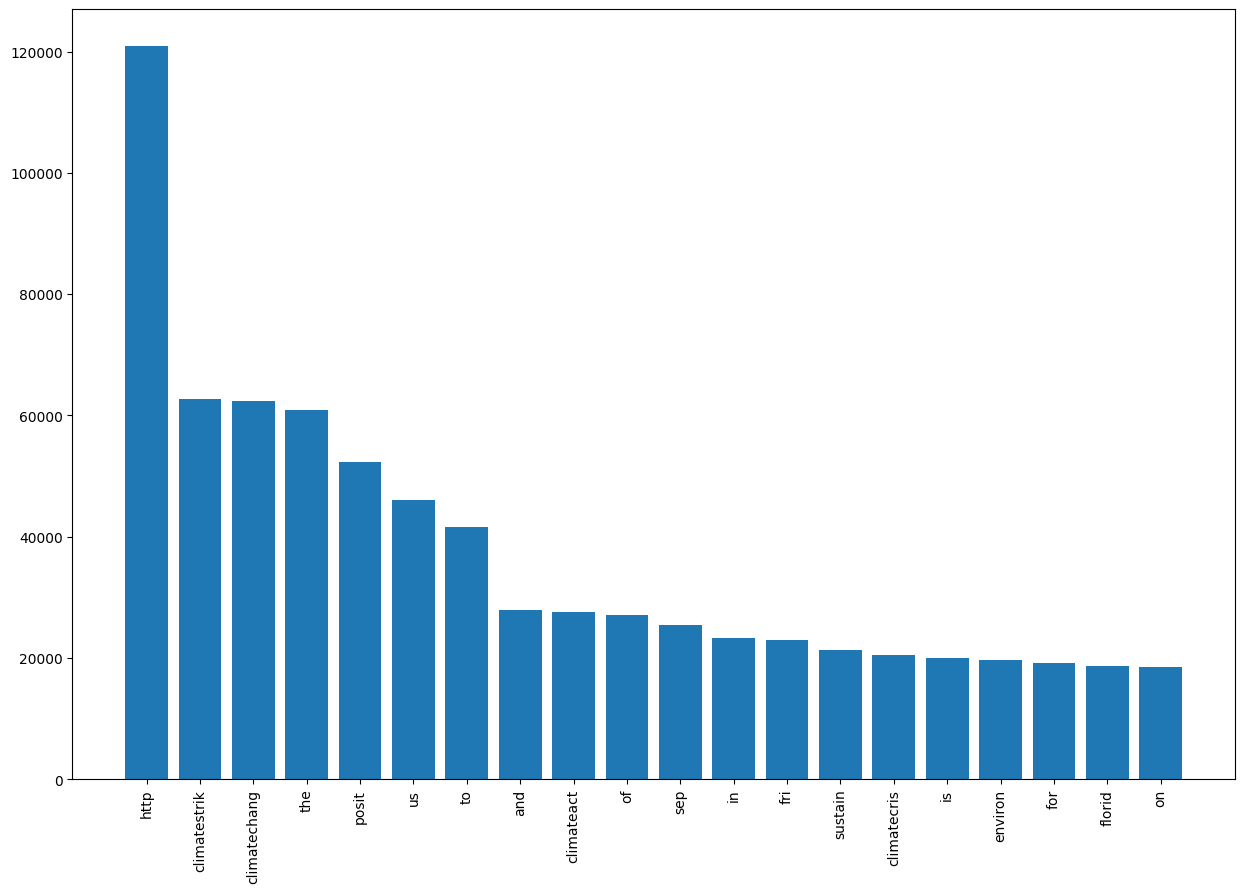

In [62]:
# opción 1:
# TOKENIZAR con .split(),
# ELIMINAR tokens de long = 1
# ELIMINAR caracteres que no sean alfanumericos y pasar todo a minuscula
# REMOVER stop words con nltk
# graficar los 20 términos más frecuentes:

tokens = filedata.split()
tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
# tokens=[word for word in tokens if word.isalpha()] si en vez de re.sub(r'[^A-Za-z0-9]+','',w) hace esto, que pasa?
tokens = [w.lower() for w in tokens if len(w)>1]
tokens = [w for w in tokens if w not in stop_words_nltk]

fdist = nltk.FreqDist(tokens)
print('numero de palabras finales = ',len(fdist))
topwords = fdist.most_common(20)
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


numero de palabras finales =  47939
[('climatestrik', 62675), ('climatechang', 62333), ('climateact', 27605), ('sustain', 21330), ('climatecris', 20464), ('environ', 19698), ('florid', 18663), ('greennewd', 15750), ('fridaysforfut', 14955), ('globalwarm', 14178), ('washington', 11515), ('austral', 11257), ('californ', 10386), ('gretathunberg', 8754), ('actonclim', 7171), ('sydney', 6906), ('climateemerg', 5775), ('savetheplanet', 5175), ('melbourn', 4985), ('chicago', 4236), ('climatechangeisr', 3672), ('bushfir', 3341), ('planet', 3089), ('climateactionnow', 3036), ('utmsourceigtwittersh', 2928), ('mexico', 2774), ('auspol', 2757), ('support', 2291), ('energy', 2206), ('strikewithus', 1888)]


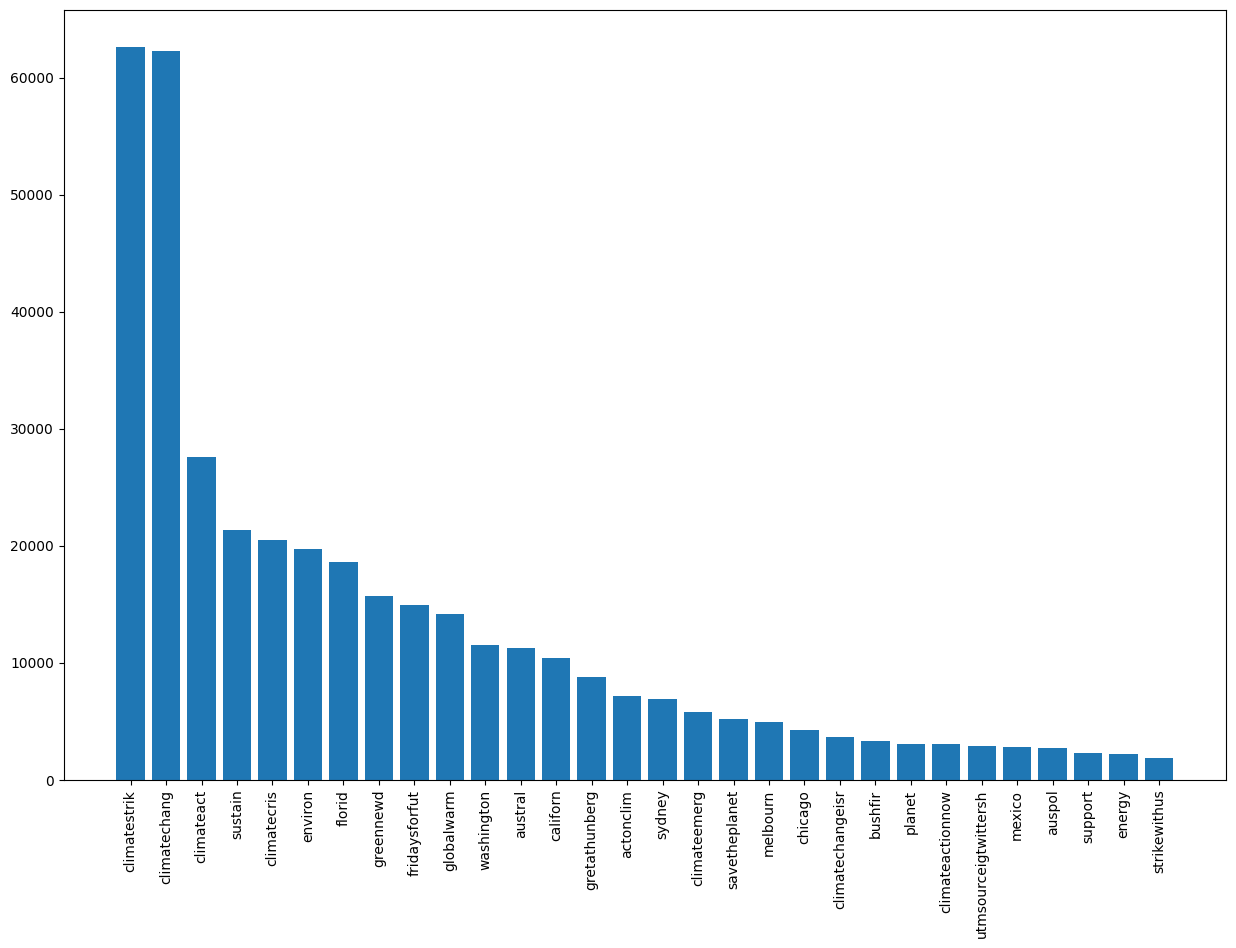

In [63]:
# opción 2:
# TOKENIZAR con nltk,
# ELIMINAR tokens de long = 1
# ELIMINAR caracteres que no sean alfanumericos
# REMOVER stop words
# graficar los 20 términos más frecuentes:
nltk.download('punkt')

tokens = nltk.word_tokenize(filedata)
tokens = [w.lower() for w in tokens if len(w)>5]
tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
tokens = [w for w in tokens if w not in stop_words_nltk_en and len(w) > 0]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(30)
print('numero de palabras finales = ',len(fdist))
print (topwords)
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Lemmatization con NLTK

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()

# probar cada una de las siguientes opciones:
#tokens = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in tokens ]
tokens = [wordnet_lemmatizer.lemmatize(w) for w in tokens ]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
x,y = zip(*topwords)
import matplotlib.pyplot as plt # Assuming you want to use matplotlib for plotting
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# volver a leer el archivo ejemplo en .txt
#input_file = open(path_in+filenametxt, "r",encoding='iso-8859-1')
input_file = open("/content/drive/MyDrive/EAFIT/ALMACENAMIENTO Y RECUPERACIÓN INFO/TRABAJOS/TRABAJO 2/climateTwitterData.csv", "r")
output_file_clean = open(path_out+filenamecleantxt, "w")

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter = PorterStemmer()
lancaster = LancasterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

for line in input_file:
    line_clean = ""
    tokens = nltk.word_tokenize(line)
    tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
    tokens = [w.lower() for w in tokens if len(w)>1]
    tokens = [w for w in tokens if w.isalpha()]
    tokens = [w for w in tokens if w not in stop_words_nltk]
    #tokens = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in tokens]
    tokens = [wordnet_lemmatizer.lemmatize(w) for w in tokens]

    #tokens = [porter.stem(w) for w in tokens]
    tokens = [lancaster.stem(w) for w in tokens]

    for w in tokens:
        line_clean=line_clean+w+" "

    if (line_clean!=""):
        line_clean=line_clean+"\n"
        output_file_clean.write(line_clean)
output_file_clean.close()

In [ ]:
input_file_clean = open(path_out+filenamecleantxt, "r", encoding='iso-8859-1')

In [ ]:
filedata = input_file_clean.read()
tokens = filedata.split()
fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('numero de palabras finales = ',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [ ]:
word_freq = fdist.most_common(len(fdist))

In [ ]:
write_uri='/content/Out'

#**Tweet Tokeneizer**

In [ ]:
# Instanciar el tokenizador de tweets
tokenizer = TweetTokenizer()
df = pd.read_csv("/content/drive/MyDrive/EAFIT/ALMACENAMIENTO Y RECUPERACIÓN INFO/TRABAJOS/TRABAJO 2/climateTwitterData.csv", encoding='iso-8859-1')
# Lista para almacenar todos los tokens
all_tokens = []

# Iterar sobre todas las columnas del DataFrame

for text in df['text']:
    tokens = tokenizer.tokenize(text)
    all_tokens.extend(tokens)

In [ ]:
print("all_tokens_title =",len(all_tokens))

all_tokens_title = 2081802


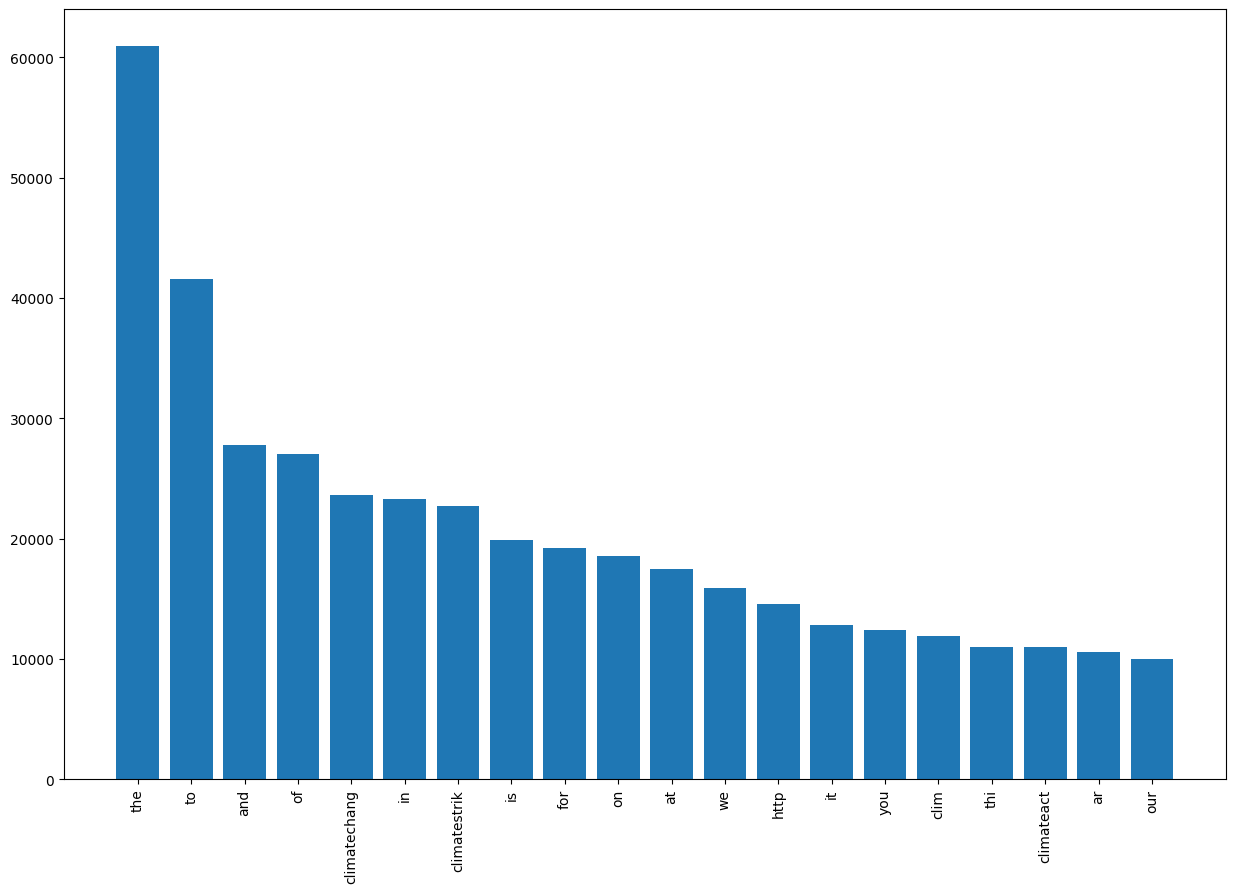

In [ ]:
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# stopwords en nltk
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words_nltk = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Size of new BoW= 88754


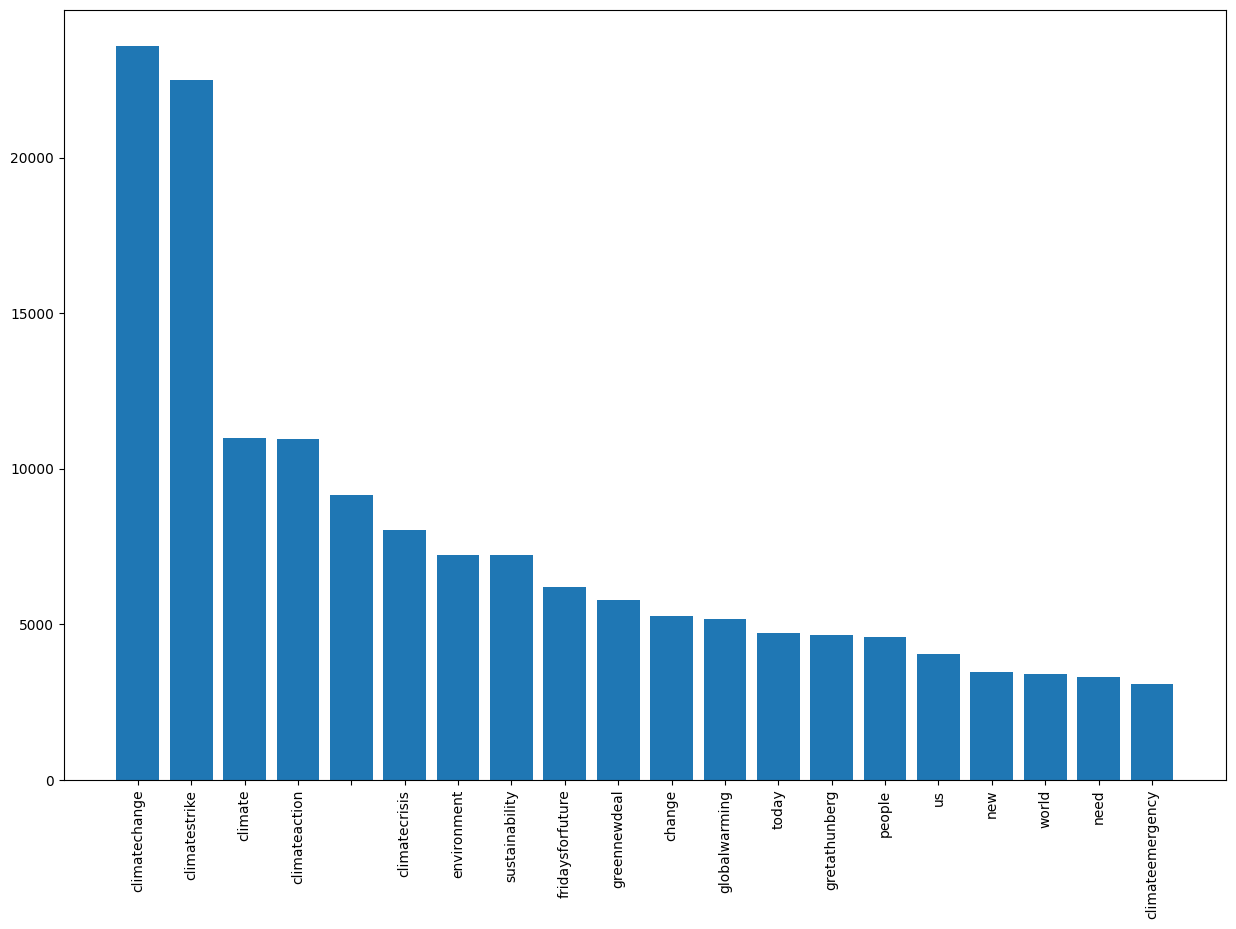

In [ ]:
# TOKENIZAR con nltk,
# ELIMINAR tokens de long = 1
# ELIMINAR caracteres que no sean alfanumericos
# REMOVER stop words
# graficar los 20 términos más frecuentes:

# ya tokenizado en all_tokens
tokens = [w.lower() for w in all_tokens if len(w)>1]
tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
tokens = [w for w in tokens if w not in stop_words_nltk]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('Size of new BoW=',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Size of new BoW = 71447


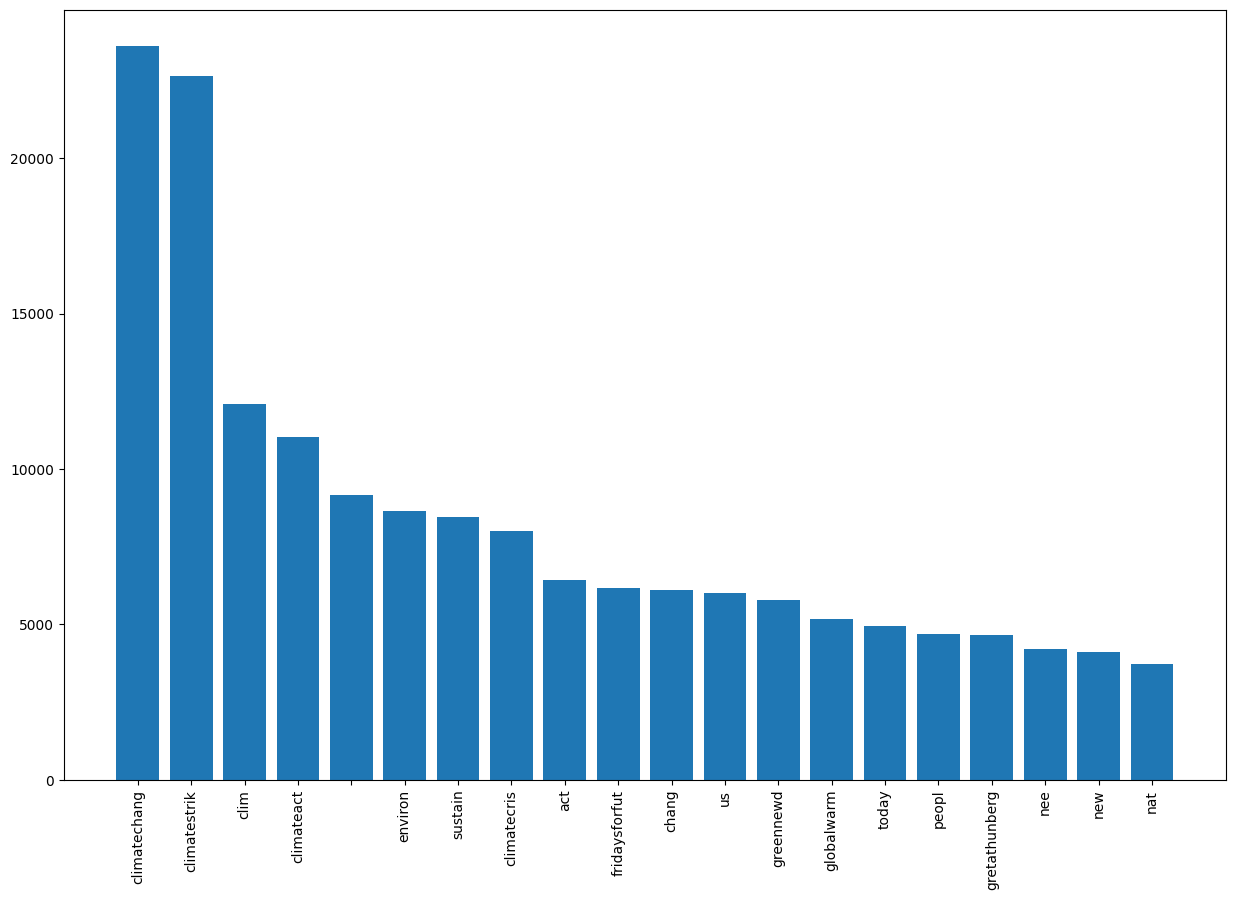

In [ ]:
# Stemming con NLTK
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter = PorterStemmer()
lancaster = LancasterStemmer()


tokens = [lancaster.stem(w) for w in tokens]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('Size of new BoW =',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

[nltk_data] Downloading package wordnet to /root/nltk_data...


Size of new BoW = 71132


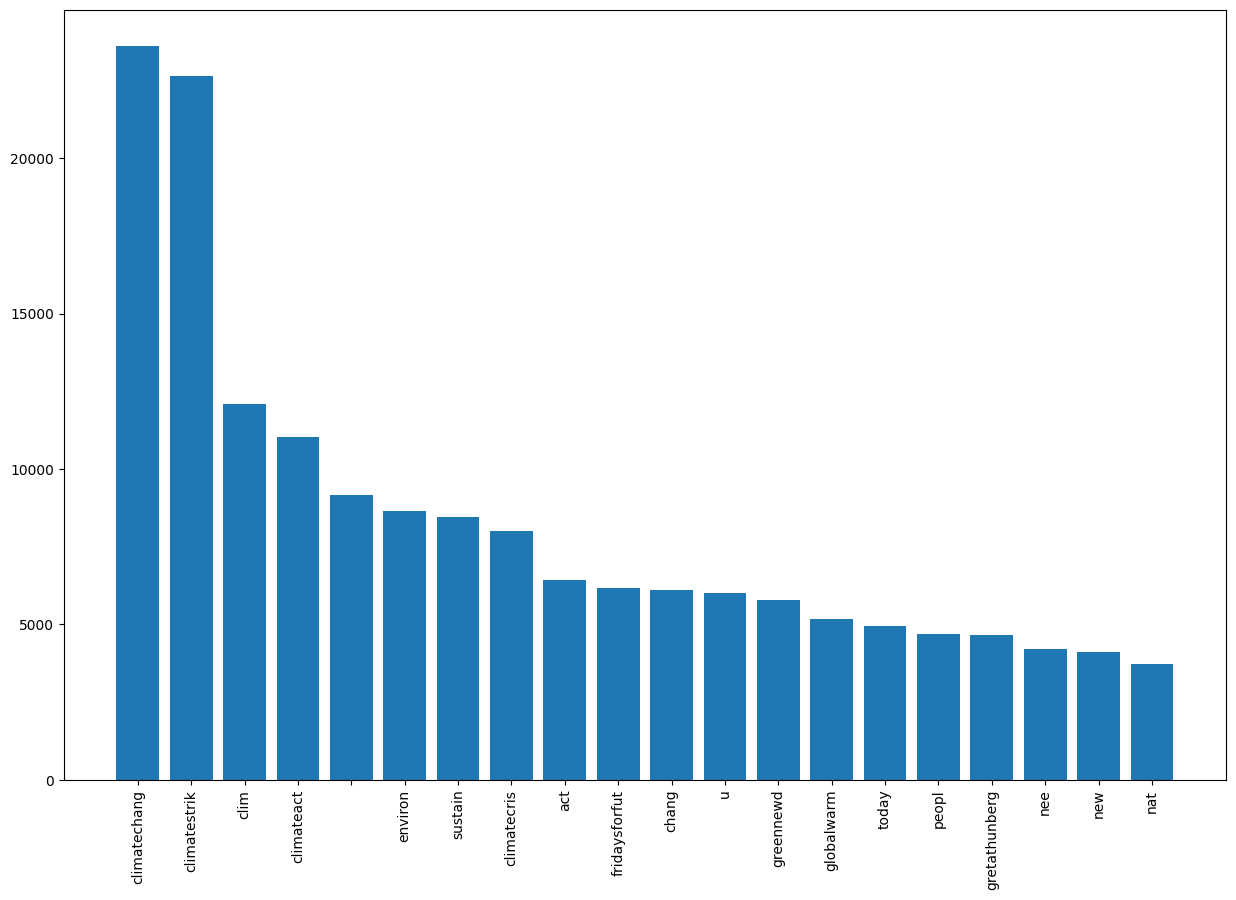

In [ ]:
# Lemmatization con NLTK
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

tokens = [wordnet_lemmatizer.lemmatize(w) for w in tokens ]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('Size of new BoW =',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# using default tokenizer in TfidfVectorizer
# Crear el vectorizador TF-IDF
vectorizer = TfidfVectorizer()

# Ajustar y transformar los documentos en una matriz TF-IDF
tfidf_matrix = vectorizer.fit_transform(tokens)

df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())



# Mostrar el DataFr

print(df_tfidf)

          00  000  0000  000000  000s  001  005  006  0069  007  ...  zwar  \
0        0.0  0.0   0.0     0.0   0.0  0.0  0.0  0.0   0.0  0.0  ...   0.0   
1        0.0  0.0   0.0     0.0   0.0  0.0  0.0  0.0   0.0  0.0  ...   0.0   
2        0.0  0.0   0.0     0.0   0.0  0.0  0.0  0.0   0.0  0.0  ...   0.0   
3        0.0  0.0   0.0     0.0   0.0  0.0  0.0  0.0   0.0  0.0  ...   0.0   
4        0.0  0.0   0.0     0.0   0.0  0.0  0.0  0.0   0.0  0.0  ...   0.0   
...      ...  ...   ...     ...   ...  ...  ...  ...   ...  ...  ...   ...   
1111704  0.0  0.0   0.0     0.0   0.0  0.0  0.0  0.0   0.0  0.0  ...   0.0   
1111705  0.0  0.0   0.0     0.0   0.0  0.0  0.0  0.0   0.0  0.0  ...   0.0   
1111706  0.0  0.0   0.0     0.0   0.0  0.0  0.0  0.0   0.0  0.0  ...   0.0   
1111707  0.0  0.0   0.0     0.0   0.0  0.0  0.0  0.0   0.0  0.0  ...   0.0   
1111708  0.0  0.0   0.0     0.0   0.0  0.0  0.0  0.0   0.0  0.0  ...   0.0   

         zwat  zwc2017  zwe  zweck  zwemvliez  zwerfvuil  zyad 

In [ ]:
# Convert the list to a DataFrame
df_all_tokens = pd.DataFrame(all_tokens, columns=['tokens'])

# Now you can save it to a CSV
df_all_tokens.to_csv('/content/drive/MyDrive/EAFIT/ALMACENAMIENTO Y RECUPERACIÓN INFO/TRABAJOS/TRABAJO 2/lemmatized_tokens.csv', index=False)

#**Gensim**

In [66]:
#Función para normalizar datos
tokens_2 = [w.lower() for w in all_tokens if len(w)>1]
tokens_2 = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
# Construcción de bigrams y trigrams
bigram = gensim.models.Phrases(tokens_2, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[tokens_2], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
#Función para remoción de stopwords, creación de bigram y trigrams
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words_nltk] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
# Remoción de stopwords
data_words_nostops = remove_stopwords(tokens_2)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
# Creación de bigrams
data_words_bigrams = make_bigrams(data_words_nostops)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
# Lematización
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[]]


In [ ]:
#Creación del bolsa de palabras
bow2={}
for twitt in data_lemmatized:
  for token in twitt:
    if token in bow2:
      bow2[token] += 1
    else:
      bow2[token] = 1
print(bow2)

In [ ]:
#Tamaño bolsa de palabras
print(len(bow2))

In [ ]:
bow2_sort = dict(sorted(bow2.items(), key=operator.itemgetter(1), reverse=True))
print(bow2_sort)

In [ ]:
firstn=10
bow2_graph= {n: bow2_sort[n] for n in list(bow2_sort)[:firstn]}
print(bow2_graph)

In [ ]:
TopN=bow2_graph.items()
x, y = zip(*TopN)
plt.figure(figsize=(15,6))
plt.bar(x, y)
plt.show()
print(len(bow2))

In [ ]:
#Nube de palabras
str1=" "
wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white").generate(str1.join(str(e) for e in data_lemmatized))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()